In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams, font_manager
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [2]:
imputedres = {}
for p in ['MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl', 'MergeEpoch_SL_AgORSeqPos_Vs_PopControl']:
    outfn = '../../data/tmp/GWAS/results_20220311/{p}/results/SAIGE.merged.results.txt'.format(p=p)
    print(outfn)
    imputedres[p] =pd.read_csv(outfn, sep='\t')
    imputedres[p].index = imputedres[p]['MarkerID']
    imputedres[p] = imputedres[p].loc[imputedres[p]['CHR'].isin([7, 17]), :]
    
imputedres[p].head()

../../data/tmp/GWAS/results_20220311/MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl/results/SAIGE.merged.results.txt


/opt/miniconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


../../data/tmp/GWAS/results_20220311/MergeEpoch_SL_AgORSeqPos_Vs_PopControl/results/SAIGE.merged.results.txt


,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,Is.SPA,AF_case,AF_ctrl,N_case,N_ctrl,N_case_hom,N_case_het,N_ctrl_hom,N_ctrl_het,N
MarkerID,,,,,,,,,,,,,,,,,,,,,
"7:41421[b37]A,G",7,41421,"7:41421[b37]A,G",A,G,257.00,0.139522,0,0.167575,0.227303,...,False,0.159836,0.136421,122,799,5,29,15,188,921
"7:41888[b37]C,T",7,41888,"7:41888[b37]C,T",C,T,123.85,0.067237,0,0.246809,0.312617,...,False,0.088525,0.063986,122,799,0,21,5,92,921
"7:42038[b37]G,C",7,42038,"7:42038[b37]G,C",G,C,124.40,0.067535,0,0.272598,0.311023,...,False,0.090574,0.064017,122,799,0,22,5,92,921
"7:42056[b37]A,G",7,42056,"7:42056[b37]A,G",A,G,71.40,0.038762,0,-0.318270,0.431243,...,False,0.038115,0.038861,122,799,1,7,0,60,921
"7:42692[b37]C,G",7,42692,"7:42692[b37]C,G",C,G,69.10,0.037514,0,0.064578,0.417972,...,False,0.037295,0.037547,122,799,0,9,0,61,921


In [3]:
p = 'Meta'
imputedres[p] = pd.read_csv('../../data/tmp/GWAS/results_20220311/METAL_Metaanalysis_Cleaned.tsv', sep='\t')
imputedres[p].index = imputedres[p]['MarkerName']
imputedres[p] = imputedres[p].loc[imputedres[p]['CHR'].isin([7, 17]), :]

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
for p in ['MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl', 'MergeEpoch_SL_AgORSeqPos_Vs_PopControl']:
    country = p.split('_')[1]
    vcffn = '../../data/tmp/GWAS/results_20220311/{p}/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.{p}.maf_1e-2.hwe_1e-6.geno_5e-2.chr7.vcf.gz'.format(p=p, c=country)
    outfn = '../../data/tmp/GWAS/results_20220311/{p}/results/{c}_LD_chr7-146308575'.format(p=p, c=country)
    cmd = 'plink --vcf {vcf} --const-fid --r2  --ld-snp {snp} --ld-window-kb 5000 --ld-window 999999 --ld-window-r2 0 --out {out}'.format(vcf=vcffn, snp='7:146308575[b37]T,C', out=outfn)
    print(cmd)
    !{cmd}

plink --vcf ../../data/tmp/GWAS/results_20220311/MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl.maf_1e-2.hwe_1e-6.geno_5e-2.chr7.vcf.gz --const-fid --r2  --ld-snp 7:146308575[b37]T,C --ld-window-kb 5000 --ld-window 999999 --ld-window-r2 0 --out ../../data/tmp/GWAS/results_20220311/MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl/results/NG_LD_chr7-146308575
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/GWAS/results_20220311/MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl/results/NG_LD_chr7-146308575.log.
Options in effect:
  --const-fid
  --ld-snp 7:146308575[b37]T,C
  --ld-window 999999
  --ld-window-kb 5000
  --ld-window-r2 0
  --out ../../data/tmp/GWAS/results_20220311/MergeEpoch_NG_ExactLVMatchqP

## Create a merged file for use for LD

In [ ]:
vcffn = '../../data/tmp/GWAS/results_20220311/MergeEpoch_SL_AgORSeqPos_Vs_PopControl/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_SL_AgORSeqPos_Vs_PopControl.maf_1e-2.hwe_1e-6.geno_5e-2.chr22.vcf.gz'
outfn = './tmp_sl'
cmd = 'plink --vcf {vcf} --const-fid --out {outfn} --make-bed --keep-allele-order --chr 7 --from-bp 136308575 --to-bp 156308575'.format(vcf=vcffn, outfn=outfn)
print(cmd)
!{cmd}

In [ ]:
vcffn = '../../data/tmp/GWAS/results_20220311/MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl.maf_1e-2.hwe_1e-6.geno_5e-2.chr22.vcf.gz'
outfn = './tmp_ng'
cmd = 'plink --vcf {vcf} --const-fid --out {outfn} --make-bed --keep-allele-order --chr 7 --from-bp 136308575 --to-bp 156308575'.format(vcf=vcffn, outfn=outfn)
print(cmd)
#!{cmd}

In [ ]:
cmd = 'plink --bfile ./tmp_ng --bmerge ./tmp_sl --out ./tmp_merge --make-bed --keep-allele-order'
print(cmd)
!{cmd}

In [ ]:
outfn = '../../data/tmp/GWAS/results_20220311/CohortsMerged_LD_chr7-146308575'
snp='7:146308575[b37]T,C'
cmd = 'plink --bfile ./tmp_merge --const-fid --r2  --ld-snp {snp} --ld-window-kb 5000 --ld-window 999999 --ld-window-r2 0 --out {out}'.format(vcf=vcffn, snp=snp, out=outfn)
print(cmd)
!{cmd}

In [ ]:
outfn = '../../data/tmp/GWAS/results_20220311/CohortsMerged_LD_chr7-146308575'
ldres = pd.read_csv(outfn+'.ld', sep='\s+')
ldres.index = ldres['SNP_B'].values

In [ ]:
ldres_all = {}
ldres_all['Meta'] = ldres
for p in ['MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl', 'MergeEpoch_SL_AgORSeqPos_Vs_PopControl']:
    country = p.split('_')[1]
    outfn = '../../data/tmp/GWAS/results_20220311/{p}/results/{c}_LD_chr7-146308575'.format(p=p, c=country)
    ldres = pd.read_csv(outfn+'.ld', sep='\s+')
    ldres.index = ldres['SNP_B'].values
    ldres_all[p] = ldres

In [ ]:
susceptibility_res = {}

In [ ]:
loc = 146308575
bound = 1e6
chrom = 7
s=4
vmin = 0
vmax = 1.0

for p in ['Meta', 'MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl', 'MergeEpoch_SL_AgORSeqPos_Vs_PopControl']:
    combined_merge = pd.merge(left=imputedres[p], right=ldres_all[p], left_index=True, right_index=True, how='left')
    
    ind = (combined_merge['POS']>(loc-bound)) & (combined_merge['POS']<(loc+bound)) & (combined_merge['CHR']==chrom)
    toplot = combined_merge.loc[ind, :]
    toplot['logP'] = -1*toplot['p.value'].apply(np.log10)
    toplot = toplot.sort_values(by='R2', ascending=True)


    (fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)
    cdat = ax.scatter(toplot[ 'POS']/1e6, toplot['logP'],
           s=s, c=toplot['R2'], edgecolor='k', linewidth=.1,
           cmap='inferno', vmax=vmax)


    ax.set_xlabel('Coordinate (MB) - chr%s' % 22)
    ax.set_ylabel('-Log P-value')

    if p != 'Meta':
        tolab = p.split('_')[1]
    else:
        tolab = 'Meta'
    
    ax.set_title('chr7 Peak - %s - %s R2' % (tolab, tolab))
    cax = ax.inset_axes([0.08, 0.85, 0.2, 0.03], transform=ax.transAxes)
    cbar = fig.colorbar(cdat, ax=ax, cax=cax, orientation='horizontal', ticks=[vmin, vmax])
    cax.set_title('$R^{2}$', fontsize=8, pad=1)
    #cbar.ax.set_xticks([vmin, vmax])
    cax.set_xticklabels([vmin, '%.2f' % vmax])
    cax.tick_params(labelsize=5, length=2, pad=.5)
    susceptibility_res['Chr7.P_%s.R2_%s' % (tolab, tolab)] = toplot

In [ ]:
loc = 146308575
bound = 1e6
chrom = 7
s=4
vmin = 0
vmax = 1.0

for p in ['Meta', 'MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl', 'MergeEpoch_SL_AgORSeqPos_Vs_PopControl']:
    combined_merge = pd.merge(left=imputedres['Meta'], right=ldres_all[p], left_index=True, right_index=True, how='left')
    
    ind = (combined_merge['POS']>(loc-bound)) & (combined_merge['POS']<(loc+bound)) & (combined_merge['CHR']==chrom)
    toplot = combined_merge.loc[ind, :]
    toplot['logP'] = -1*toplot['p.value'].apply(np.log10)
    toplot = toplot.sort_values(by='R2', ascending=True)


    (fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)
    cdat = ax.scatter(toplot[ 'POS']/1e6, toplot['logP'],
           s=s, c=toplot['R2'], edgecolor='k', linewidth=.1,
           cmap='inferno', vmax=vmax)


    ax.set_xlabel('Coordinate (MB) - chr%s' % 22)
    ax.set_ylabel('-Log P-value')

    if p != 'Meta':
        tolab = p.split('_')[1]
    else:
        tolab = 'Meta'
    
    ax.set_title('chr7 Peak - Meta - %s R2' % (tolab))
    cax = ax.inset_axes([0.08, 0.85, 0.2, 0.03], transform=ax.transAxes)
    cbar = fig.colorbar(cdat, ax=ax, cax=cax, orientation='horizontal', ticks=[vmin, vmax])
    cax.set_title('$R^{2}$', fontsize=8, pad=1)
    #cbar.ax.set_xticks([vmin, vmax])
    cax.set_xticklabels([vmin, '%.2f' % vmax])
    cax.tick_params(labelsize=5, length=2, pad=.5)
    susceptibility_res['Chr7.P_%s.R2_%s' % ('Meta', tolab)] = toplot

In [ ]:
vcffn = '../../data/tmp/GWAS/results_20220311/MergeEpoch_SL_AgORSeqPos_Vs_PopControl/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_SL_AgORSeqPos_Vs_PopControl.maf_1e-2.hwe_1e-6.geno_5e-2.chr17.vcf.gz'
outfn = '../../data/tmp/GWAS/results_20220311/MergeEpoch_SL_AgORSeqPos_Vs_PopControl/results/SL_LD_chr17-33192408'
cmd = 'plink --vcf {vcf} --const-fid --r2  --ld-snp {snp} --ld-window-kb 5000 --ld-window 999999 --ld-window-r2 0 --out {out}'.format(vcf=vcffn, snp='17:33192408[b37]C,G', out=outfn)
print(cmd)
!{cmd}

In [ ]:
p = 'MergeEpoch_SL_AgORSeqPos_Vs_PopControl'
ldres = pd.read_csv(outfn+'.ld', sep='\s+')
ldres.index = ldres['SNP_B'].values

slloc_merge1 = pd.merge(left=imputedres[p], right=ldres, left_index=True, right_index=True, how='left')

loc = 33192408
bound = 1e6
chrom = 17

ind = (slloc_merge1['POS']>(loc-bound)) & (slloc_merge1['POS']<(loc+bound)) & (slloc_merge1['CHR']==chrom)


toplot = slloc_merge1.loc[ind, :]
toplot['logP'] = -1*toplot['p.value'].apply(np.log10)
toplot.head()

In [ ]:
s=4
(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)

cdat = ax.scatter(toplot[ 'POS']/1e6, toplot['logP'],
           s=s, c=toplot['R2'], edgecolor='None',
           cmap='inferno')

vmin = 0
vmax = 1

ax.set_xlabel('Coordinate (MB) - chr%s' % 17)
ax.set_ylabel('-Log P-value')

ax.set_title('chr17 Peak 1 - Sierra Leone')
cax = ax.inset_axes([0.08, 0.85, 0.2, 0.03], transform=ax.transAxes)
cbar = fig.colorbar(cdat, ax=ax, cax=cax, orientation='horizontal', ticks=[vmin, vmax])
cax.set_title('$R^{2}$', fontsize=8, pad=1)
#cbar.ax.set_xticks([vmin, vmax])
cax.set_xticklabels([vmin, '%.2f' % vmax])
cax.tick_params(labelsize=5, length=2, pad=.5)
plt.savefig('../../figures/chr17peak1_SL_LD.pdf', bbox_inches='tight')
plt.savefig('../../figures/chr17peak1_SL_LD.png', bbox_inches='tight')

In [ ]:
susceptibility_res['SL2'] = toplot

In [ ]:
vcffn = '../../data/tmp/GWAS/results_20220311/MergeEpoch_SL_AgORSeqPos_Vs_PopControl/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_SL_AgORSeqPos_Vs_PopControl.maf_1e-2.hwe_1e-6.geno_5e-2.chr17.vcf.gz'
outfn = '../../data/tmp/GWAS/results_20220311/MergeEpoch_SL_AgORSeqPos_Vs_PopControl/results/SL_LD_chr17-68745251'
cmd = 'plink --vcf {vcf} --const-fid --r2  --ld-snp {snp} --ld-window-kb 5000 --ld-window 999999 --ld-window-r2 0 --out {out}'.format(vcf=vcffn, snp='17:68745251[b37]C,G', out=outfn)
print(cmd)
!{cmd}

In [ ]:
p = 'MergeEpoch_SL_AgORSeqPos_Vs_PopControl'
ldres = pd.read_csv(outfn+'.ld', sep='\s+')
ldres.index = ldres['SNP_B'].values

slloc_merge1 = pd.merge(left=imputedres[p], right=ldres, left_index=True, right_index=True, how='left')

loc = 68745251
bound = 1e6
chrom = 17
ind = (slloc_merge1['POS']>(loc-bound)) & (slloc_merge1['POS']<(loc+bound)) & (slloc_merge1['CHR']==chrom)
toplot = slloc_merge1.loc[ind, :]
toplot['logP'] = -1*toplot['p.value'].apply(np.log10)
toplot.head()

In [ ]:
s=4
(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)

cdat = ax.scatter(toplot[ 'POS']/1e6, toplot['logP'],
           s=s, c=toplot['R2'], edgecolor='None',
           cmap='inferno')

vmin = 0
vmax = 1

ax.set_xlabel('Coordinate (MB) - chr%s' % 17)
ax.set_ylabel('-Log P-value')

ax.set_title('chr17 Peak 1 - Sierra Leone')
cax = ax.inset_axes([0.08, 0.85, 0.2, 0.03], transform=ax.transAxes)
cbar = fig.colorbar(cdat, ax=ax, cax=cax, orientation='horizontal', ticks=[vmin, vmax])
cax.set_title('$R^{2}$', fontsize=8, pad=1)
#cbar.ax.set_xticks([vmin, vmax])
cax.set_xticklabels([vmin, '%.2f' % vmax])
cax.tick_params(labelsize=5, length=2, pad=.5)
plt.savefig('../../figures/chr17peak2_SL_LD.pdf', bbox_inches='tight')
plt.savefig('../../figures/chr17peak2_SL_LD.png', bbox_inches='tight')

In [ ]:
susceptibility_res['SL1'] = toplot

In [ ]:
import seaborn as sns


In [23]:
idmap = pd.read_csv('gs://popgen-gwas/data/genotype/merge/Imputed_Plink2/varidmap.tsv', sep='\t')
var2id = dict(zip(idmap['POSID'], idmap['ID']))
idmap.head()

,POSID,ID
0,"1:723918[b37]G,A",rs144434834
1,"1:724103[b37]A,G",rs111533735
2,"1:724169[b37]A,G",.
3,"1:724300[b37]C,T",rs12069907
4,"1:725286[b37]G,A",rs111203397


In [24]:
title_map = {'SL1':'SL - Suscept. - 1', 'SL2':'SL - Suscept - 2', 'Chr7.P_Meta.R2_Meta':'Meta - Suscept. - 1'}

In [25]:
susceptibility_res.keys()

dict_keys(['Chr7.P_Meta.R2_Meta', 'Chr7.P_NG.R2_NG', 'Chr7.P_SL.R2_SL', 'Chr7.P_Meta.R2_NG', 'Chr7.P_Meta.R2_SL', 'SL2', 'SL1'])

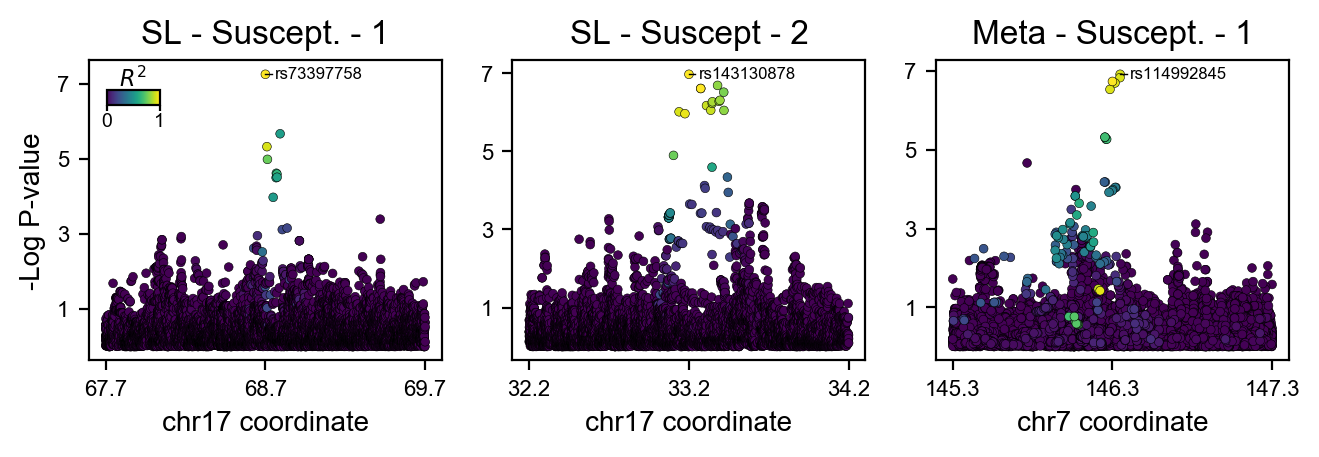

In [27]:
(fig,axes) = plt.subplots(1,3, figsize=(7.5,2.5), dpi=200, gridspec_kw={'wspace':.2, 'left':.1, 'right':.9, 'bottom':.25, 'top':.85})

s=10
chrom = [17, 17, 7]
snplabfontsize=6
lw = .5
for i,key in enumerate(['SL1', 'SL2', 'Chr7.P_Meta.R2_Meta']):
    cdat = axes[i].scatter(susceptibility_res[key][ 'POS']/1e6, susceptibility_res[key]['logP'],
           s=s, c=susceptibility_res[key]['R2'], edgecolor='k', linewidth=.2,
           cmap='viridis', vmin=0, vmax=1, rasterized=True)

    
    if i == 0:
        axes[i].set_ylabel('-Log P-value', fontsize=10)

        
        
    axes[i].set_xlabel('chr%s coordinate' % chrom[i], fontsize=10)
    axes[i].set_title(title_map[key], fontsize=12)
    minv = susceptibility_res[key]['POS'].min() / 1e6
    delta = (susceptibility_res[key]['POS'].max() /1e6) - minv    
    axes[i].set_xticks([minv, minv+delta*.5, minv+delta])
    axes[i].set_xticklabels([np.round(x, decimals=1) for x in [minv, minv+delta*.5, minv+delta]], fontsize=8)
    axes[i].set_yticks([1,3,5,7,9])
    axes[i].set_yticklabels([1,3,5,7,9], fontsize=8)

    maxind = susceptibility_res[key].sort_values(by='p.value').index[0]
    axes[i].text((susceptibility_res[key].loc[maxind, 'POS']/1e6) + delta*.03, susceptibility_res[key].loc[maxind, 'logP'], var2id[maxind], ha='left', va='center', fontsize=snplabfontsize)
    axes[i].plot([(susceptibility_res[key].loc[maxind, 'POS']/1e6), (susceptibility_res[key].loc[maxind, 'POS']/1e6) + delta*.02],
                 [susceptibility_res[key].loc[maxind, 'logP'], susceptibility_res[key].loc[maxind, 'logP']], 'k', linewidth=lw)        
    
cax = axes[0].inset_axes([0.05, .85, 0.15, 0.05], transform=axes[0].transAxes)
cbar = fig.colorbar(cdat, ax=axes[i], cax=cax, orientation='horizontal', ticks=[0, 1])
cax.set_title('$R^{2}$', fontsize=8, pad=1)
cax.tick_params(labelsize=7, length=2, pad=.5)        

plt.savefig('../../figures/GWAS_Susceptibility_LD_Peaks_SAIGE.png', rasterized=True)        
plt.savefig('../../figures/GWAS_Susceptibility_LD_Peaks_SAIGE.pdf', rasterized=True)  

In [ ]:
3

## Outcome

In [27]:
imputedres_outcome = {}

outcome_fns = ['../../data/tmp/GWAS/outcome_H3covar_20220315/{p}/results/SAIGE.merged.results.txt'.format(p='MergeEpoch_NG_Died_vs_Survived'),
               '../../data/tmp/GWAS/outcome_H3covar_20220315/{p}/results/SAIGE.merged.results.txt'.format(p='MergeEpoch_SL_Died_vs_Survived'),
               '/mnt/disks/gwas/data/tmp/GWAS/outcome_H3covar_20220315/METAL_Metaanalysis_Cleaned.tsv']

labels = ['NG', 'SL', 'Meta']

for i,outfn in enumerate(outcome_fns):
    print(outfn)
    imputedres_outcome[labels[i]] =pd.read_csv(outfn, sep='\t')
    if labels[i] == 'Meta':
        imputedres_outcome[labels[i]].index = imputedres_outcome[labels[i]]['MarkerName']        
    else:
        imputedres_outcome[labels[i]].index = imputedres_outcome[labels[i]]['MarkerID']
    
imputedres_outcome[labels[i]].head()

../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/results/SAIGE.merged.results.txt


/opt/miniconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_SL_Died_vs_Survived/results/SAIGE.merged.results.txt
/mnt/disks/gwas/data/tmp/GWAS/outcome_H3covar_20220315/METAL_Metaanalysis_Cleaned.tsv


/opt/miniconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MarkerName,Allele1,Allele2,Weight,Zscore,p.value,Direction,CHR,POS
MarkerName,,,,,,,,,
"1:723918[b37]G,A","1:723918[b37]G,A",a,g,303.0,-1.141,0.2538,-?,1,723918
"1:729940[b37]C,G","1:729940[b37]C,G",c,g,303.0,1.239,0.2155,+?,1,729940
"1:730232[b37]C,T","1:730232[b37]C,T",t,c,303.0,-0.039,0.9691,-?,1,730232
"1:730249[b37]G,A","1:730249[b37]G,A",a,g,303.0,-0.170,0.8648,-?,1,730249
"1:731716[b37]C,G","1:731716[b37]C,G",c,g,303.0,0.015,0.9879,+?,1,731716


In [28]:
outcome_res = {}

In [29]:
ngloc = imputedres_outcome['NG']
vcffn = '../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_NG_Died_vs_Survived.maf_1e-2.hwe_1e-6.geno_5e-2.chr3.vcf.gz'
outfn = '../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/results/NG_LD_chr3-7330265'
snp='3:7330265[b37]A,G'
cmd = 'plink --vcf {vcf} --const-fid --r2  --ld-snp {snp} --ld-window-kb 5000 --ld-window 999999 --ld-window-r2 0 --out {out}'.format(vcf=vcffn, snp=snp, out=outfn)
print(cmd)
!{cmd}


plink --vcf ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_NG_Died_vs_Survived.maf_1e-2.hwe_1e-6.geno_5e-2.chr3.vcf.gz --const-fid --r2  --ld-snp 3:7330265[b37]A,G --ld-window-kb 5000 --ld-window 999999 --ld-window-r2 0 --out ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/results/NG_LD_chr3-7330265
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/results/NG_LD_chr3-7330265.log.
Options in effect:
  --const-fid
  --ld-snp 3:7330265[b37]A,G
  --ld-window 999999
  --ld-window-kb 5000
  --ld-window-r2 0
  --out ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/results/NG_LD_chr3-7330265
  --r2
  --vcf ../../data/tmp/GWAS/outcome_H3covar_202

In [30]:
ldres = pd.read_csv(outfn+'.ld', sep='\s+')
ldres.index = ldres['SNP_B'].values

In [31]:
ldres.shape

(53598, 7)

In [32]:
ngloc_merge = pd.merge(left=ngloc, right=ldres, left_index=True, right_index=True, how='left')

In [33]:
ngloc_merge.head()

,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_ctrl_hom,N_ctrl_het,N,CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R2
MarkerID,,,,,,,,,,,,,,,,,,,,,
"1:723918[b37]G,A",1,723918,"1:723918[b37]G,A",G,A,61.0,0.100660,0,0.336450,0.294838,...,1,33,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:729940[b37]C,G",1,729940,"1:729940[b37]C,G",C,G,67.1,0.110726,0,0.357814,0.288863,...,2,35,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:730232[b37]C,T",1,730232,"1:730232[b37]C,T",C,T,29.5,0.048680,0,0.015866,0.410089,...,1,18,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:730249[b37]G,A",1,730249,"1:730249[b37]G,A",G,A,28.5,0.047030,0,0.070905,0.416355,...,1,17,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:731716[b37]C,G",1,731716,"1:731716[b37]C,G",C,G,21.7,0.035809,0,0.007624,0.501962,...,0,13,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
loc = 7330265
bound = 1e6
chrom = 3

ind = (ngloc_merge['POS']>(loc-bound)) & (ngloc_merge['POS']<(loc+bound)) & (ngloc_merge['CHR']==chrom)
toplot = ngloc_merge.loc[ind, :]
toplot['logP'] = -1*toplot['p.value'].apply(np.log10)
toplot.head()

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_ctrl_het,N,CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R2,logP
MarkerID,,,,,,,,,,,,,,,,,,,,,
"3:6330283[b37]T,C",3,6330283,"3:6330283[b37]T,C",T,C,488.4,0.805941,0,0.463135,0.243670,...,64,303,3.0,7330265.0,"3:7330265[b37]A,G",3.0,6330283.0,"3:6330283[b37]T,C",0.000269,1.542527
"3:6330284[b37]G,A",3,6330284,"3:6330284[b37]G,A",G,A,58.0,0.095710,0,-0.478672,0.309566,...,41,303,3.0,7330265.0,"3:7330265[b37]A,G",3.0,6330284.0,"3:6330284[b37]G,A",0.006933,0.913500
"3:6330321[b37]C,A",3,6330321,"3:6330321[b37]C,A",C,A,130.6,0.215512,0,-0.019580,0.220501,...,71,303,3.0,7330265.0,"3:7330265[b37]A,G",3.0,6330321.0,"3:6330321[b37]C,A",0.006591,0.031871
"3:6330324[b37]A,G",3,6330324,"3:6330324[b37]A,G",A,G,488.4,0.805941,0,0.463135,0.243670,...,64,303,3.0,7330265.0,"3:7330265[b37]A,G",3.0,6330324.0,"3:6330324[b37]A,G",0.000269,1.542527
"3:6330444[b37]G,A",3,6330444,"3:6330444[b37]G,A",G,A,117.6,0.194059,0,0.023110,0.218116,...,59,303,3.0,7330265.0,"3:7330265[b37]A,G",3.0,6330444.0,"3:6330444[b37]G,A",0.000013,0.038284


In [35]:
toplot['R2'].isnull().value_counts()

False    8569
Name: R2, dtype: int64

In [36]:
outcome_res['Nigeria - 1'] = toplot

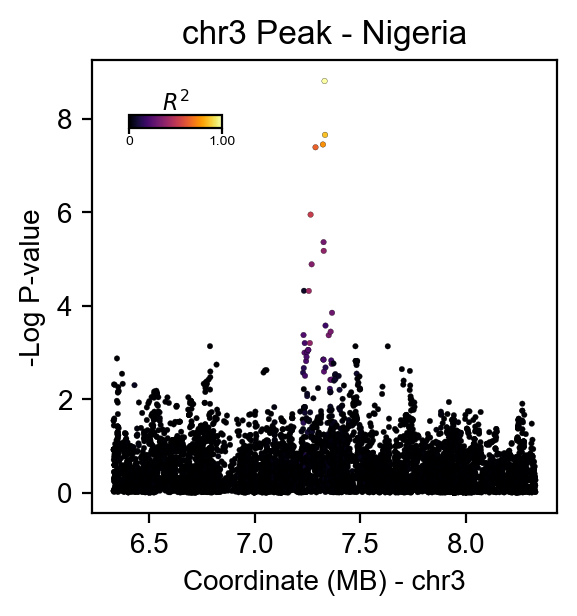

In [37]:
s=4
(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)

cdat = ax.scatter(toplot[ 'POS']/1e6, toplot['logP'],
           s=s, c=toplot['R2'], edgecolor='k', linewidth=.1,
           cmap='inferno')

vmin = 0
vmax = 1

ax.set_xlabel('Coordinate (MB) - chr%s' % 3)
ax.set_ylabel('-Log P-value')

ax.set_title('chr3 Peak - Nigeria')
cax = ax.inset_axes([0.08, 0.85, 0.2, 0.03], transform=ax.transAxes)
cbar = fig.colorbar(cdat, ax=ax, cax=cax, orientation='horizontal', ticks=[vmin, vmax])
cax.set_title('$R^{2}$', fontsize=8, pad=1)
#cbar.ax.set_xticks([vmin, vmax])
cax.set_xticklabels([vmin, '%.2f' % vmax])
cax.tick_params(labelsize=5, length=2, pad=.5)

In [38]:
vcffn = '../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_NG_Died_vs_Survived.maf_1e-2.hwe_1e-6.geno_5e-2.chr22.vcf.gz'
outfn = '../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/results/NG_LD_chr22-30619983'
snp='22:30619983[b37]G,A'
cmd = 'plink --vcf {vcf} --const-fid --r2  --ld-snp {snp} --ld-window-kb 5000 --ld-window 999999 --ld-window-r2 0 --out {out}'.format(vcf=vcffn, snp=snp, out=outfn)
print(cmd)
!{cmd}

plink --vcf ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_NG_Died_vs_Survived.maf_1e-2.hwe_1e-6.geno_5e-2.chr22.vcf.gz --const-fid --r2  --ld-snp 22:30619983[b37]G,A --ld-window-kb 5000 --ld-window 999999 --ld-window-r2 0 --out ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/results/NG_LD_chr22-30619983
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/results/NG_LD_chr22-30619983.log.
Options in effect:
  --const-fid
  --ld-snp 22:30619983[b37]G,A
  --ld-window 999999
  --ld-window-kb 5000
  --ld-window-r2 0
  --out ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/results/NG_LD_chr22-30619983
  --r2
  --vcf ../../data/tmp/GWAS/outcome_

In [39]:
ldres = pd.read_csv(outfn+'.ld', sep='\s+')
ldres.index = ldres['SNP_B'].values

In [40]:
meta_ngloc_merge = pd.merge(left=imputedres_outcome['Meta'], right=ldres, left_index=True, right_index=True, how='left')

In [41]:
meta_ngloc_merge.head()

,MarkerName,Allele1,Allele2,Weight,Zscore,p.value,Direction,CHR,POS,CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R2
MarkerName,,,,,,,,,,,,,,,,
"1:723918[b37]G,A","1:723918[b37]G,A",a,g,303.0,-1.141,0.2538,-?,1,723918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:729940[b37]C,G","1:729940[b37]C,G",c,g,303.0,1.239,0.2155,+?,1,729940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:730232[b37]C,T","1:730232[b37]C,T",t,c,303.0,-0.039,0.9691,-?,1,730232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:730249[b37]G,A","1:730249[b37]G,A",a,g,303.0,-0.170,0.8648,-?,1,730249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:731716[b37]C,G","1:731716[b37]C,G",c,g,303.0,0.015,0.9879,+?,1,731716,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
loc = 30619983
bound = 1e6
chrom = 22

ind = (meta_ngloc_merge['POS']>(loc-bound)) & (meta_ngloc_merge['POS']<(loc+bound)) & (meta_ngloc_merge['CHR']==chrom)
toplot = meta_ngloc_merge.loc[ind, :]
toplot['logP'] = -1*toplot['p.value'].apply(np.log10)
toplot.head()

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,MarkerName,Allele1,Allele2,Weight,Zscore,p.value,Direction,CHR,POS,CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R2,logP
MarkerName,,,,,,,,,,,,,,,,,
"22:29620232[b37]C,T","22:29620232[b37]C,T",t,c,411.0,-0.874,0.38230,--,22,29620232,22.0,30619983.0,"22:30619983[b37]G,A",22.0,29620232.0,"22:29620232[b37]C,T",0.000940,0.417596
"22:29620458[b37]G,C","22:29620458[b37]G,C",c,g,303.0,-0.285,0.77580,-?,22,29620458,22.0,30619983.0,"22:30619983[b37]G,A",22.0,29620458.0,"22:29620458[b37]G,C",0.015427,0.110250
"22:29620900[b37]C,T","22:29620900[b37]C,T",t,c,303.0,-1.056,0.29100,-?,22,29620900,22.0,30619983.0,"22:30619983[b37]G,A",22.0,29620900.0,"22:29620900[b37]C,T",0.005725,0.536107
"22:29621477[b37]C,T","22:29621477[b37]C,T",t,c,303.0,1.851,0.06415,+?,22,29621477,22.0,30619983.0,"22:30619983[b37]G,A",22.0,29621477.0,"22:29621477[b37]C,T",0.017382,1.192803
"22:29621861[b37]T,C","22:29621861[b37]T,C",t,c,303.0,0.010,0.99190,+?,22,29621861,22.0,30619983.0,"22:30619983[b37]G,A",22.0,29621861.0,"22:29621861[b37]T,C",0.005569,0.003532


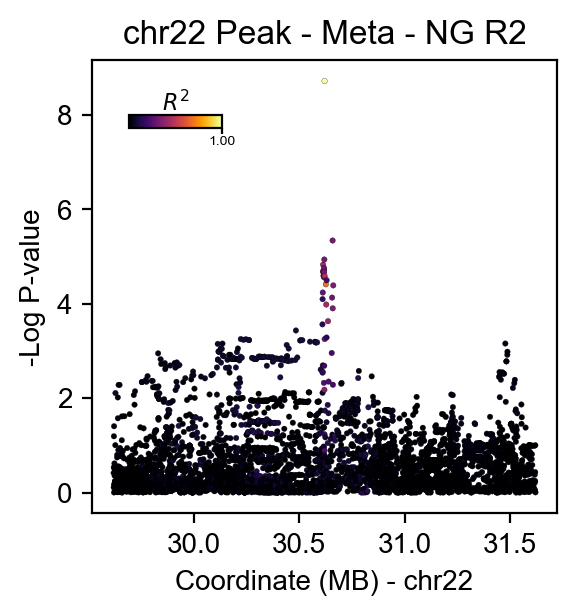

In [43]:
s=4
(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)

cdat = ax.scatter(toplot[ 'POS']/1e6, toplot['logP'],
           s=s, c=toplot['R2'], edgecolor='k', linewidth=.1,
           cmap='inferno')

vmin = 0
vmax = 1

ax.set_xlabel('Coordinate (MB) - chr%s' % 22)
ax.set_ylabel('-Log P-value')

ax.set_title('chr22 Peak - Meta - NG R2')
cax = ax.inset_axes([0.08, 0.85, 0.2, 0.03], transform=ax.transAxes)
cbar = fig.colorbar(cdat, ax=ax, cax=cax, orientation='horizontal', ticks=[vmin, vmax])
cax.set_title('$R^{2}$', fontsize=8, pad=1)
#cbar.ax.set_xticks([vmin, vmax])
cax.set_xticklabels([vmin, '%.2f' % vmax])
cax.tick_params(labelsize=5, length=2, pad=.5)

In [44]:
outcome_res['Meta - 1 - NGR2'] = toplot

In [45]:
vcffn = '../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_SL_Died_vs_Survived/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_SL_Died_vs_Survived.maf_1e-2.hwe_1e-6.geno_5e-2.chr22.vcf.gz'
outfn = '../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_SL_Died_vs_Survived/results/NG_LD_chr22-30619983'
snp='22:30619983[b37]G,A'
cmd = 'plink --vcf {vcf} --const-fid --r2  --ld-snp {snp} --ld-window-kb 5000 --ld-window 999999 --ld-window-r2 0 --out {out}'.format(vcf=vcffn, snp=snp, out=outfn)
print(cmd)
!{cmd}

plink --vcf ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_SL_Died_vs_Survived/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_SL_Died_vs_Survived.maf_1e-2.hwe_1e-6.geno_5e-2.chr22.vcf.gz --const-fid --r2  --ld-snp 22:30619983[b37]G,A --ld-window-kb 5000 --ld-window 999999 --ld-window-r2 0 --out ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_SL_Died_vs_Survived/results/NG_LD_chr22-30619983
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_SL_Died_vs_Survived/results/NG_LD_chr22-30619983.log.
Options in effect:
  --const-fid
  --ld-snp 22:30619983[b37]G,A
  --ld-window 999999
  --ld-window-kb 5000
  --ld-window-r2 0
  --out ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_SL_Died_vs_Survived/results/NG_LD_chr22-30619983
  --r2
  --vcf ../../data/tmp/GWAS/outcome_

In [46]:
ldres = pd.read_csv(outfn+'.ld', sep='\s+')
ldres.index = ldres['SNP_B'].values

In [47]:
meta_slloc_merge = pd.merge(left=imputedres_outcome['Meta'], right=ldres, left_index=True, right_index=True, how='left')

In [48]:
meta_slloc_merge.head()

,MarkerName,Allele1,Allele2,Weight,Zscore,p.value,Direction,CHR,POS,CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R2
MarkerName,,,,,,,,,,,,,,,,
"1:723918[b37]G,A","1:723918[b37]G,A",a,g,303.0,-1.141,0.2538,-?,1,723918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:729940[b37]C,G","1:729940[b37]C,G",c,g,303.0,1.239,0.2155,+?,1,729940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:730232[b37]C,T","1:730232[b37]C,T",t,c,303.0,-0.039,0.9691,-?,1,730232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:730249[b37]G,A","1:730249[b37]G,A",a,g,303.0,-0.170,0.8648,-?,1,730249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:731716[b37]C,G","1:731716[b37]C,G",c,g,303.0,0.015,0.9879,+?,1,731716,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
loc = 30619983
bound = 1e6
chrom = 22

ind = (meta_slloc_merge['POS']>(loc-bound)) & (meta_slloc_merge['POS']<(loc+bound)) & (meta_slloc_merge['CHR']==chrom)
toplot = meta_slloc_merge.loc[ind, :]
toplot['logP'] = -1*toplot['p.value'].apply(np.log10)
toplot.head()

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,MarkerName,Allele1,Allele2,Weight,Zscore,p.value,Direction,CHR,POS,CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R2,logP
MarkerName,,,,,,,,,,,,,,,,,
"22:29620232[b37]C,T","22:29620232[b37]C,T",t,c,411.0,-0.874,0.38230,--,22,29620232,22.0,30619983.0,"22:30619983[b37]G,A",22.0,29620232.0,"22:29620232[b37]C,T",0.021541,0.417596
"22:29620458[b37]G,C","22:29620458[b37]G,C",c,g,303.0,-0.285,0.77580,-?,22,29620458,22.0,30619983.0,"22:30619983[b37]G,A",22.0,29620458.0,"22:29620458[b37]G,C",0.005267,0.110250
"22:29620900[b37]C,T","22:29620900[b37]C,T",t,c,303.0,-1.056,0.29100,-?,22,29620900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.536107
"22:29621477[b37]C,T","22:29621477[b37]C,T",t,c,303.0,1.851,0.06415,+?,22,29621477,22.0,30619983.0,"22:30619983[b37]G,A",22.0,29621477.0,"22:29621477[b37]C,T",0.006863,1.192803
"22:29621861[b37]T,C","22:29621861[b37]T,C",t,c,303.0,0.010,0.99190,+?,22,29621861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003532


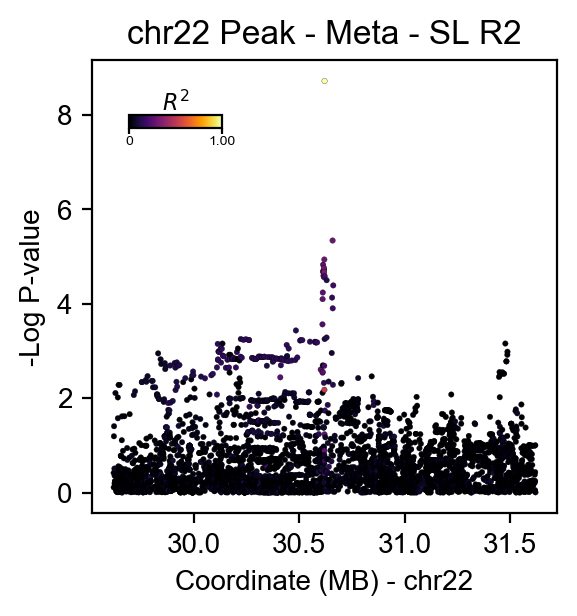

In [50]:
s=4
(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)

cdat = ax.scatter(toplot[ 'POS']/1e6, toplot['logP'],
           s=s, c=toplot['R2'], edgecolor='k', linewidth=.1,
           cmap='inferno')

vmin = 0
vmax = 1

ax.set_xlabel('Coordinate (MB) - chr%s' % 22)
ax.set_ylabel('-Log P-value')

ax.set_title('chr22 Peak - Meta - SL R2')
cax = ax.inset_axes([0.08, 0.85, 0.2, 0.03], transform=ax.transAxes)
cbar = fig.colorbar(cdat, ax=ax, cax=cax, orientation='horizontal', ticks=[vmin, vmax])
cax.set_title('$R^{2}$', fontsize=8, pad=1)
#cbar.ax.set_xticks([vmin, vmax])
cax.set_xticklabels([vmin, '%.2f' % vmax])
cax.tick_params(labelsize=5, length=2, pad=.5)

## Create a merged file for use for LD

In [51]:
vcffn = '../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_SL_Died_vs_Survived/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_SL_Died_vs_Survived.maf_1e-2.hwe_1e-6.geno_5e-2.chr22.vcf.gz'
outfn = './tmp_sl'
cmd = 'plink --vcf {vcf} --const-fid --out {outfn} --make-bed --keep-allele-order --chr 22 --from-bp 27619983 --to-bp 33619983'.format(vcf=vcffn, outfn=outfn)
print(cmd)
!{cmd}

plink --vcf ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_SL_Died_vs_Survived/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_SL_Died_vs_Survived.maf_1e-2.hwe_1e-6.geno_5e-2.chr22.vcf.gz --const-fid --out ./tmp_sl --make-bed --keep-allele-order --chr 22 --from-bp 27619983 --to-bp 33619983
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./tmp_sl.log.
Options in effect:
  --chr 22
  --const-fid
  --from-bp 27619983
  --keep-allele-order
  --make-bed
  --out ./tmp_sl
  --to-bp 33619983
  --vcf ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_SL_Died_vs_Survived/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_SL_Died_vs_Survived.maf_1e-2.hwe_1e-6.geno_5e-2.chr22.vcf.gz

64423 MB RAM detected; reserving 32211 MB for main workspace.
Allocated 24158 MB successfully, after larger attempt(s) failed.
--vc

In [52]:
vcffn = '../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_NG_Died_vs_Survived.maf_1e-2.hwe_1e-6.geno_5e-2.chr22.vcf.gz'
outfn = './tmp_ng'
cmd = 'plink --vcf {vcf} --const-fid --out {outfn} --make-bed --keep-allele-order --chr 22 --from-bp 27619983 --to-bp 33619983'.format(vcf=vcffn, outfn=outfn)
print(cmd)
!{cmd}

plink --vcf ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_NG_Died_vs_Survived.maf_1e-2.hwe_1e-6.geno_5e-2.chr22.vcf.gz --const-fid --out ./tmp_ng --make-bed --keep-allele-order --chr 22 --from-bp 27619983 --to-bp 33619983
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./tmp_ng.log.
Options in effect:
  --chr 22
  --const-fid
  --from-bp 27619983
  --keep-allele-order
  --make-bed
  --out ./tmp_ng
  --to-bp 33619983
  --vcf ../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_NG_Died_vs_Survived/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_NG_Died_vs_Survived.maf_1e-2.hwe_1e-6.geno_5e-2.chr22.vcf.gz

64423 MB RAM detected; reserving 32211 MB for main workspace.
Allocated 24158 MB successfully, after larger attempt(s) failed.
--vc

In [53]:
cmd = 'plink --bfile ./tmp_ng --bmerge ./tmp_sl --out ./tmp_merge --make-bed --keep-allele-order'
print(cmd)
!{cmd}

plink --bfile ./tmp_ng --bmerge ./tmp_sl --out ./tmp_merge --make-bed --keep-allele-order
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ./tmp_merge.log.
Options in effect:
  --bfile ./tmp_ng
  --bmerge ./tmp_sl
  --keep-allele-order
  --make-bed
  --out ./tmp_merge

64423 MB RAM detected; reserving 32211 MB for main workspace.
Allocated 24158 MB successfully, after larger attempt(s) failed.
303 people loaded from ./tmp_ng.fam.
108 people to be merged from ./tmp_sl.fam.
Of these, 108 are new, while 0 are present in the base dataset.
23580 markers loaded from ./tmp_ng.bim.
22882 markers to be merged from ./tmp_sl.bim.
Of these, 3119 are new, while 19763 are present in the base dataset.
Performing single-pass merge (411 people, 26699 variants).
Merged fileset written to ./tmp_merge-merge.bed + ./tmp_merge-merge.bim +
./tmp_merge-merge.fam .
26699 variants loaded from 

In [54]:
vcffn = '../../data/tmp/GWAS/outcome_H3covar_20220315/MergeEpoch_SL_Died_vs_Survived/imputed_data/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.MergeEpoch_SL_Died_vs_Survived.maf_1e-2.hwe_1e-6.geno_5e-2.chr22.vcf.gz'
outfn = '../../data/tmp/GWAS/outcome_H3covar_20220315/NGandSL_LD_chr22-30619983'
snp='22:30619983[b37]G,A'
cmd = 'plink --bfile ./tmp_merge --const-fid --r2  --ld-snp {snp} --ld-window-kb 5000 --ld-window 999999 --ld-window-r2 0 --out {out}'.format(vcf=vcffn, snp=snp, out=outfn)
print(cmd)
!{cmd}

plink --bfile ./tmp_merge --const-fid --r2  --ld-snp 22:30619983[b37]G,A --ld-window-kb 5000 --ld-window 999999 --ld-window-r2 0 --out ../../data/tmp/GWAS/outcome_H3covar_20220315/NGandSL_LD_chr22-30619983
PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/GWAS/outcome_H3covar_20220315/NGandSL_LD_chr22-30619983.log.
Options in effect:
  --bfile ./tmp_merge
  --const-fid
  --ld-snp 22:30619983[b37]G,A
  --ld-window 999999
  --ld-window-kb 5000
  --ld-window-r2 0
  --out ../../data/tmp/GWAS/outcome_H3covar_20220315/NGandSL_LD_chr22-30619983
  --r2

64423 MB RAM detected; reserving 32211 MB for main workspace.
Allocated 24158 MB successfully, after larger attempt(s) failed.
26699 variants loaded from .bim file.
411 people (0 males, 0 females, 411 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
../../data/tmp/GWAS/outcome_H3covar_20220315/NGandSL_LD

In [55]:
ldres = pd.read_csv(outfn+'.ld', sep='\s+')
ldres.index = ldres['SNP_B'].values

In [56]:
meta_combined_merge = pd.merge(left=imputedres_outcome['Meta'], right=ldres, left_index=True, right_index=True, how='left')

In [57]:
meta_combined_merge.head()

,MarkerName,Allele1,Allele2,Weight,Zscore,p.value,Direction,CHR,POS,CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R2
MarkerName,,,,,,,,,,,,,,,,
"1:723918[b37]G,A","1:723918[b37]G,A",a,g,303.0,-1.141,0.2538,-?,1,723918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:729940[b37]C,G","1:729940[b37]C,G",c,g,303.0,1.239,0.2155,+?,1,729940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:730232[b37]C,T","1:730232[b37]C,T",t,c,303.0,-0.039,0.9691,-?,1,730232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:730249[b37]G,A","1:730249[b37]G,A",a,g,303.0,-0.170,0.8648,-?,1,730249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1:731716[b37]C,G","1:731716[b37]C,G",c,g,303.0,0.015,0.9879,+?,1,731716,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
loc = 30619983
bound = 1e6
chrom = 22

ind = (meta_combined_merge['POS']>(loc-bound)) & (meta_combined_merge['POS']<(loc+bound)) & (meta_combined_merge['CHR']==chrom)
toplot = meta_combined_merge.loc[ind, :]
toplot['logP'] = -1*toplot['p.value'].apply(np.log10)
toplot.head()

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,MarkerName,Allele1,Allele2,Weight,Zscore,p.value,Direction,CHR,POS,CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R2,logP
MarkerName,,,,,,,,,,,,,,,,,
"22:29620232[b37]C,T","22:29620232[b37]C,T",t,c,411.0,-0.874,0.38230,--,22,29620232,22.0,30619983.0,"22:30619983[b37]G,A",22.0,29620232.0,"22:29620232[b37]C,T",0.001167,0.417596
"22:29620458[b37]G,C","22:29620458[b37]G,C",c,g,303.0,-0.285,0.77580,-?,22,29620458,22.0,30619983.0,"22:30619983[b37]G,A",22.0,29620458.0,"22:29620458[b37]G,C",0.015713,0.110250
"22:29620900[b37]C,T","22:29620900[b37]C,T",t,c,303.0,-1.056,0.29100,-?,22,29620900,22.0,30619983.0,"22:30619983[b37]G,A",22.0,29620900.0,"22:29620900[b37]C,T",0.005725,0.536107
"22:29621477[b37]C,T","22:29621477[b37]C,T",t,c,303.0,1.851,0.06415,+?,22,29621477,22.0,30619983.0,"22:30619983[b37]G,A",22.0,29621477.0,"22:29621477[b37]C,T",0.005209,1.192803
"22:29621861[b37]T,C","22:29621861[b37]T,C",t,c,303.0,0.010,0.99190,+?,22,29621861,22.0,30619983.0,"22:30619983[b37]G,A",22.0,29621861.0,"22:29621861[b37]T,C",0.005569,0.003532


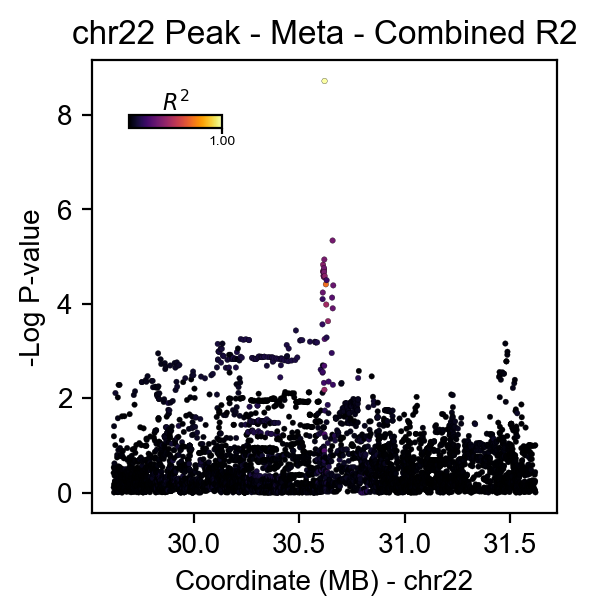

In [59]:
s=4
(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)

vmin = 0
vmax = 1.0

cdat = ax.scatter(toplot[ 'POS']/1e6, toplot['logP'],
           s=s, c=toplot['R2'], edgecolor='k', linewidth=.1,
           cmap='inferno', vmax=vmax)


ax.set_xlabel('Coordinate (MB) - chr%s' % 22)
ax.set_ylabel('-Log P-value')

ax.set_title('chr22 Peak - Meta - Combined R2')
cax = ax.inset_axes([0.08, 0.85, 0.2, 0.03], transform=ax.transAxes)
cbar = fig.colorbar(cdat, ax=ax, cax=cax, orientation='horizontal', ticks=[vmin, vmax])
cax.set_title('$R^{2}$', fontsize=8, pad=1)
#cbar.ax.set_xticks([vmin, vmax])
cax.set_xticklabels([vmin, '%.2f' % vmax])
cax.tick_params(labelsize=5, length=2, pad=.5)

In [60]:
outcome_res['Meta - 1 - MetaR2'] = toplot

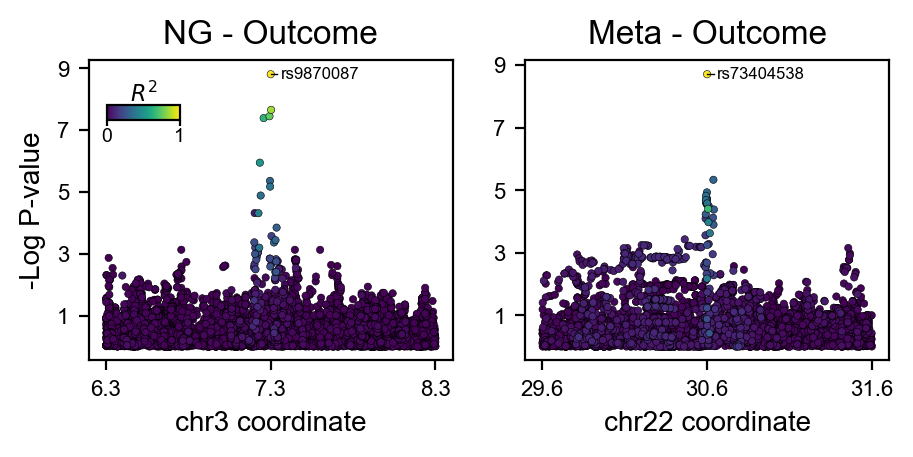

In [62]:
(fig,axes) = plt.subplots(1,2, figsize=(5,2.5), dpi=200, gridspec_kw={'wspace':.2, 'left':.1, 'right':.9, 'bottom':.25, 'top':.85})

snplabfontsize=6
lw = .5

s=7
chrom = [3, 22]
titles = ['NG - Outcome', 'Meta - Outcome']
for i,key in enumerate(['Nigeria - 1', 'Meta - 1 - MetaR2']):
    Z = outcome_res[key].sort_values(by='R2', ascending=True)
    cdat = axes[i].scatter(Z[ 'POS']/1e6, Z['logP'],
           s=s, c=Z['R2'], edgecolor='k', linewidth=.2,
           cmap='viridis', vmin=0, vmax=1)

    
    if i == 0:
        axes[i].set_ylabel('-Log P-value', fontsize=10)

        
        
    axes[i].set_xlabel('chr%s coordinate' % chrom[i], fontsize=10)
    axes[i].set_title(titles[i], fontsize=12)
    minv = Z['POS'].min() / 1e6
    delta = (Z['POS'].max() /1e6) - minv    
    axes[i].set_xticks([minv, minv+delta*.5, minv+delta])
    axes[i].set_xticklabels([np.round(x, decimals=1) for x in [minv, minv+delta*.5, minv+delta]], fontsize=8)
    axes[i].set_yticks([1,3,5,7,9])
    axes[i].set_yticklabels([1,3,5,7,9], fontsize=8)

    maxind = outcome_res[key].sort_values(by='p.value').index[0]
    axes[i].text((outcome_res[key].loc[maxind, 'POS']/1e6) + delta*.03, outcome_res[key].loc[maxind, 'logP'], var2id[maxind], ha='left', va='center', fontsize=snplabfontsize)
    axes[i].plot([(outcome_res[key].loc[maxind, 'POS']/1e6), (outcome_res[key].loc[maxind, 'POS']/1e6) + delta*.02],
                 [outcome_res[key].loc[maxind, 'logP'], outcome_res[key].loc[maxind, 'logP']], 'k', linewidth=lw)       
    
    
    
    
cax = axes[0].inset_axes([0.05, .8, 0.2, 0.05], transform=axes[0].transAxes)
cbar = fig.colorbar(cdat, ax=axes[i], cax=cax, orientation='horizontal', ticks=[0, 1])
cax.set_title('$R^{2}$', fontsize=8, pad=1)
cax.tick_params(labelsize=7, length=2, pad=.5)        

#axes[2].axis('off')
plt.savefig('../../figures/GWAS_Outcome_LD_Peaks_SAIGE.png')        
plt.savefig('../../figures/GWAS_Outcome_LD_Peaks_SAIGE.pdf')  
